In [1]:
import MDAnalysis as mda
import numpy as np
import pmda
from pmda import rdf, rms
from MDAnalysisData import datasets

In [2]:
print(mda.__version__)
print(pmda.__version__)

0.18.1-dev
0.1.1+34.g3d78fc7.dirty


In [3]:
nhaa = datasets.fetch_nhaa_equilibrium()
u = mda.Universe(nhaa.topology, nhaa.trajectory)

In [4]:
ref = mda.Universe(nhaa.topology)

In [5]:
ca = u.select_atoms('name CA')
ca

<AtomGroup with 752 atoms>

In [6]:
rmsd = rms.RMSD(ca, ref.select_atoms('name CA'))

In [82]:
%time rmsd.run(n_jobs=1)
%time rmsd.run(n_jobs=4)

CPU times: user 12 ms, sys: 16.9 ms, total: 28.9 ms
Wall time: 17.4 s
CPU times: user 14 ms, sys: 48.8 ms, total: 62.8 ms
Wall time: 13.4 s


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

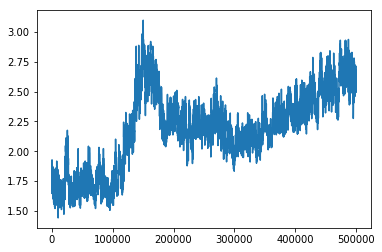

In [9]:
plt.plot(rmsd.rmsd[:,1], rmsd.rmsd[:,2])

In [10]:
rmsd.rmsd

array([[0.00000000e+00, 0.00000000e+00, 1.64690232e+00],
       [1.00000000e+00, 1.00000000e+02, 1.82993035e+00],
       [2.00000000e+00, 2.00000000e+02, 1.80124722e+00],
       ...,
       [4.99800000e+03, 4.99800000e+05, 2.61932982e+00],
       [4.99900000e+03, 4.99900000e+05, 2.49379004e+00],
       [5.00000000e+03, 5.00000000e+05, 2.57827688e+00]])

In [11]:
SOD = u.select_atoms('resname SOD')
SOD

<AtomGroup with 121 atoms>

In [12]:
ASP = u.select_atoms('resname ASP')
ASP

<AtomGroup with 240 atoms>

In [64]:
ASP.residues.resids

array([ 11,  40,  65, 119, 133, 163, 164, 178, 282, 354,  11,  40,  65,
       119, 133, 163, 164, 178, 282, 354])

In [68]:
O_ASP = ASP.select_atoms('name OD1 or name OD2')
O_ASP

<AtomGroup with 40 atoms>

In [16]:
rdf_SOD_O = rdf.InterRDF(SOD, O_ASP, nbins=100, range=(0.0, 5.0))

In [66]:
rdf_SOD_O.run(n_jobs=4);

In [18]:
rdf_SOD_O.bins

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975, 1.025, 1.075, 1.125, 1.175, 1.225, 1.275, 1.325,
       1.375, 1.425, 1.475, 1.525, 1.575, 1.625, 1.675, 1.725, 1.775,
       1.825, 1.875, 1.925, 1.975, 2.025, 2.075, 2.125, 2.175, 2.225,
       2.275, 2.325, 2.375, 2.425, 2.475, 2.525, 2.575, 2.625, 2.675,
       2.725, 2.775, 2.825, 2.875, 2.925, 2.975, 3.025, 3.075, 3.125,
       3.175, 3.225, 3.275, 3.325, 3.375, 3.425, 3.475, 3.525, 3.575,
       3.625, 3.675, 3.725, 3.775, 3.825, 3.875, 3.925, 3.975, 4.025,
       4.075, 4.125, 4.175, 4.225, 4.275, 4.325, 4.375, 4.425, 4.475,
       4.525, 4.575, 4.625, 4.675, 4.725, 4.775, 4.825, 4.875, 4.925,
       4.975])

In [19]:
rdf_SOD_O.rdf

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.19613377,  1.91168798, 12.01993346, 33.37706443,
       53.69969986, 58.3061599 , 51.65179561, 38.4383747 , 27.87875008,
       19.69183757, 13.40136249,  9.55944004,  6.9893064 ,  5.05454283,
        4.11856632,  3.4214629 ,  2.96292699,  2.36896434,  2.26880253,
        1.97908183,  1.90532255,  1.90249257,  2.19676022,  1.94873462,
        2.11714893,  2.07093005,  2.17478093,  2.3037254 ,  2.30

<function matplotlib.pyplot.show(*args, **kw)>

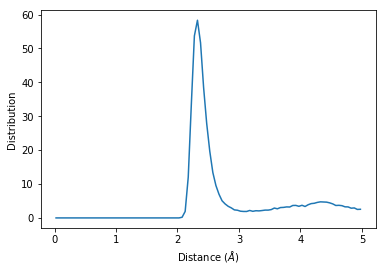

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rdf_SOD_O.bins, rdf_SOD_O.rdf)
ax.set_xlabel('Distance ($\AA$)')
ax.set_ylabel('Distribution')
plt.show

In [23]:
#add graph of two sodium in the binding site

In [61]:
SOD1 = SOD.select_atoms('resid 29375 or resid 29401')

In [25]:
from pmda import custom

In [26]:
def Z_SOD(ag):
    return [ag.universe.trajectory.time, ag.positions[0][2], ag.positions[1][2]]

In [78]:
parallel_z = custom.AnalysisFromFunction(Z_SOD, u, SOD1)
parallel_z.run(n_jobs=4);
parallel_z.results

array([[0.00000000e+00, 4.81100044e+01, 7.85400085e+01],
       [1.00000000e+02, 4.80500031e+01, 7.71300049e+01],
       [2.00000000e+02, 4.79400024e+01, 7.81700058e+01],
       ...,
       [4.99800000e+05, 4.84000015e+01, 4.58800049e+01],
       [4.99900000e+05, 4.84799995e+01, 4.50400009e+01],
       [5.00000000e+05, 4.80100021e+01, 4.46599998e+01]])

In [28]:
z = np.array(parallel_z.results)
z

array([[0.00000000e+00, 4.81100044e+01, 7.85400085e+01],
       [1.00000000e+02, 4.80500031e+01, 7.71300049e+01],
       [2.00000000e+02, 4.79400024e+01, 7.81700058e+01],
       ...,
       [4.99800000e+05, 4.84000015e+01, 4.58800049e+01],
       [4.99900000e+05, 4.84799995e+01, 4.50400009e+01],
       [5.00000000e+05, 4.80100021e+01, 4.46599998e+01]])

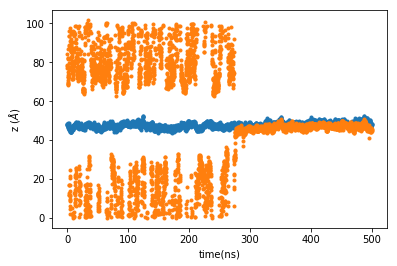

In [60]:
plt.plot(z[:,0]/1000, z[:,1], '.')
plt.plot(z[:,0]/1000, z[:,2], '.')
plt.xlabel('time(ns)');
plt.ylabel('z ($\AA$)');

In [ ]:
# %load bsites.py
from __future__ import absolute_import, division

import numpy as np

from pmda.parallel import ParallelAnalysisBase

class bsites_finder(ParallelAnalysisBase):
    """
    This
    """
    def __init__(self, u, g1, g2, cutoff=5.0):
        super(bsites_finder, self).__init__(u, (g1, g2))
        self.cutoff=str(cutoff)

    def _prepare(self):
        self.ids = None

    def _single_frame(self, ts, atomgroups):
        g1, g2 = atomgroups
        ag = g1+g2
        id1 = ' '.join(str(id) for id in g1.resids)
        id2 = ' '.join(str(id) for id in g2.resids)
        sites = ag.select_atoms('resid {0} and around {1} (resid {2})'.format(
               id1, self.cutoff, id2))
        ids = np.unique(np.array(sites.residues.ix))
        return ids

    def _conclude(self,):
        self.ids = np.array([])
        for result in self._results:
            self.ids = np.append(self.ids, result)

    @staticmethod
    def _reduce(res, result_single_frame):
        if isinstance(res, list) and len(res) == 0:
            # Convert res from an empty list to a numpy array
            # which has the same shape as the single frame result
            res = result_single_frame
        else:
            # Append new single frame result to res
            res = np.append(res, result_single_frame)
        return res


In [ ]:
from bsites import bsites_finder

In [31]:
asp = bsites_finder(u, ASP, SOD, cutoff=3.0)

In [32]:
asp.run(n_jobs=4)

In [33]:
asp.ids

array([154., 530., 154., ..., 154., 529., 530.])

In [45]:
ids, counts = np.unique(asp.ids, return_counts=True)
print(ids)
print(counts)

[  1.  30. 109. 123. 153. 154. 168. 272. 344. 377. 406. 431. 485. 499.
 529. 530. 544. 648. 720.]
[  26  107   92  154 3350 3778  101  115  100   32   73    3   53    2
 1571 4932  109  125   84]


In [55]:
ids_str = [str(int(n)) for n in ids]

In [56]:
print(ids_str)

['1', '30', '109', '123', '153', '154', '168', '272', '344', '377', '406', '431', '485', '499', '529', '530', '544', '648', '720']


In [41]:
ind = range(len(ids))

Text(0.5,0,'residue index')

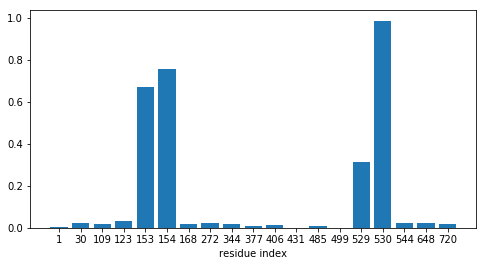

In [79]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.bar(ind, counts/5000)
plt.xticks(ind, ids_str);
plt.xlabel('residue index')

In [76]:
u.atoms.residues[154]

<Residue ASP, 164>

<Residue ASP, 163>